## Settings

In [45]:
parameter = 'Reviews' # choose from Rewies or New (for rating)

In [46]:
from os import listdir
from os.path import isfile, join

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [47]:
main_path = f'C:\\Data\\UCL\\@MSc Project - Data and Sources\\Sentiment results\\Portfolios\\{parameter}'

## Load the data

In [64]:
files = [f for f in listdir(main_path) if ( isfile(join(main_path, f)) ) and (('RETURNS_LONGS' in f) and ('Weighted' in f)) or (('RETURNS_LONGS' in f) and ('low_risk' in f)) or (('RETURNS_LONGS' in f) and ('Momentum' in f))]

In [65]:
data = {f: pd.read_csv(join(main_path, f), index_col=0) for f in files}

In [66]:
data.keys()

dict_keys(['RETURNS_LONGS_S&P 500_low_risk.csv', 'RETURNS_LONGS_S&P 500_Momentum.csv', 'RETURNS_LONGS_S&P 500_Reviews_1MWeighted.csv', 'RETURNS_LONGS_S&P 500_Reviews_1M_DiffWeighted.csv', 'RETURNS_LONGS_S&P 500_Reviews_3MWeighted.csv', 'RETURNS_LONGS_S&P 500_Reviews_3M_DiffWeighted.csv'])

## Get months return

In [67]:
min_dim = min([dataset.shape[1] for dataset in data.values()])

month_returns = {
    key: dataset.iloc[:,-min_dim:].mean(axis=0) for (key, dataset) in data.items()
}

month_returns_df = pd.DataFrame(month_returns)

## Get correlation and corresponding heatmap

In [68]:
names=['Low_risk', 'Momentum', '1M', '$\Delta$1M', '3M', '$\Delta$3M']

corr_matrix = month_returns_df.corr()
corr_matrix.columns = names
corr_matrix.index = names

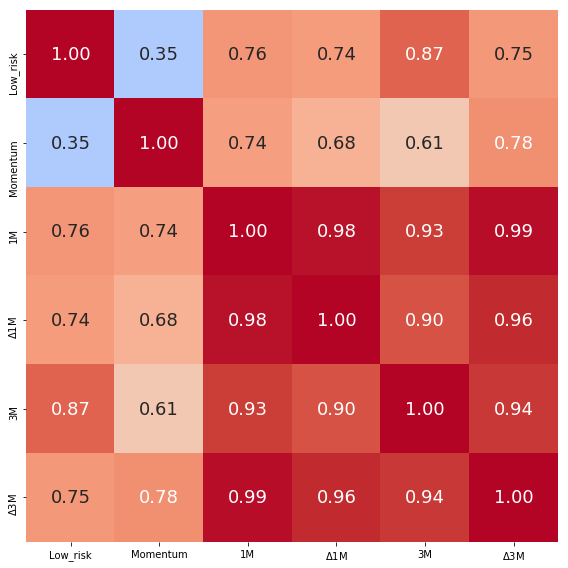

In [69]:
plt.figure(figsize=(8,8))

sns.heatmap(
    corr_matrix,
    annot=True,
    fmt='.2f',
    annot_kws={'size': 18},
    cbar=False,
    cmap='coolwarm',
    square=True,
    vmin=0.0
)


plt.tight_layout()
plt.savefig(f'C:\\Data\\UCL\\@MSc Project - Data and sources\\Images\\corr_{parameter}_weighted.png')